© Nadav Gordon Bar

My GitHub:

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/NadavGB86/Diabetic_Retinopathy_Detection"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# I’m assuming that you want over the EDA part – and allowing myself to briefly reference the conclusions and assumptions gathered here.

# **<center>$0 - The$ $Problem$ 🔍**

**In this `california_housing` data set project I will be implementing a solution for a regression problem using various ML techniques**

* The target variable is the `median house value` for California districts,
expressed in hundreds of thousands of dollars ($100,000). So, I'm tring to create a prediction engine that will predict the median house price for a district based on its features.

* This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html


$california-housing-dataset:$
--------------------------

**Data Set Characteristics:**

    Number of Instances: 20640

    Number of Attributes: 8 numeric, predictive attributes and the target

    Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    Missing Attribute Values: None


* This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

* An household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surpinsingly large values for block groups with few households
and many empty houses, such as vacation resorts.

# **<center>$1 - Technical$ $Environment$💻</center>**

### **Installments**

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%%bash
python --version
pip install --quiet https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
pip install --quiet -U "graphviz" "pydot" "phik" "imbalanced-learn" "scikit-learn" "more-itertools" "shap" "scipy"
apt install --quiet gdal-bin python-gdal python3-gdal
apt install --quiet python3-rtree
pip install --quiet git+git://github.com/geopandas/geopandas.git
pip install --quiet -U "descartes" "geopy" "plotly_express" "ipython-autotime"

Python 3.7.12
Reading package lists...
Building dependency tree...
Reading state information...
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,859 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.






In [ ]:
%load_ext autotime

time: 253 µs (started: 2022-01-28 11:38:48 +00:00)


In [ ]:
!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 28.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
time: 3.23 s (started: 2022-01-28 11:38:48 +00:00)


In [ ]:
!pip show pandas-profiling

In [ ]:
!pip check

### **!RESTERT RUNTIME!** (`Ctrl`+`M`+`.`)

### **Lib Imports**

In [ ]:
# General tools
import os
import sys
if 'google.colab' in sys.modules: 
    from google.colab import files, drive, data_table
import re
import random
from datetime import datetime
from time import time
import math
from collections import OrderedDict, defaultdict
from functools import reduce
import itertools
from itertools import product
import more_itertools
from more_itertools import all_equal
import tqdm
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

# Main tools
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
import pydot
import graphviz
np.set_printoptions(precision=3, suppress=True)
import scipy
import scipy.stats
from scipy.stats.stats import pearsonr
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_venn
import matplotlib.colors as mcolors
%matplotlib inline
from IPython.display import Image
colors_1 = list(mcolors.CSS4_COLORS.keys())[10:]
colors_2 = sns.color_palette()
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
palette_list = ['pastel', 'Pastel1', 'Pastel2', 'husl',
                'coolwarm','rocket', 'rainbow_r', 'magma_r',
                'Set2', 'Set1_r', 'RdYlGn', 'vlag', 'cool']

# for observing maps
import folium
from folium.plugins import HeatMap
basemap=folium.Map()

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.geocoders import Photon
from geopy.extra.rate_limiter import RateLimiter

# For Data Preprocessing
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler,PowerTransformer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.multiclass import unique_labels

# For clustering and noise
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# For scoring and validation
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import KFold, StratifiedShuffleSplit, ShuffleSplit
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, f1_score, fbeta_score, make_scorer, r2_score
from sklearn.metrics import log_loss, pairwise_distances
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.fixes import loguniform
from sklearn.tree import export_graphviz
from six import StringIO
import phik
from phik.report import plot_correlation_matrix
from phik import report
import shap

# Model Algo
from sklearn.linear_model import LinearRegression, ElasticNet
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor

# Data
from sklearn.datasets import fetch_california_housing

print(f'sklearn: {sklearn.__version__} np: {np.__version__} pd: {pd.__version__} xgb: {xgb.__version__} shap: {shap.__version__}')

seedNum = 2022
np.random.seed(seedNum)
random.seed(seedNum)

sklearn: 1.0.2 np: 1.19.5 pd: 1.1.5 xgb: 0.90 shap: 0.40.0


In [ ]:
drive.mount('/content/drive/') # Mounting

!pwd 
os.listdir('/content/')

Mounted at /content/drive/
/content


['.config', 'drive', 'sample_data']

# AGAIN! I’m assuming that you want over the EDA part – and allowing myself to briefly reference the conclusions and assumptions gathered here.

### Upload DF

In [ ]:
df = fetch_california_housing(as_frame=True).frame # DF uploading using "as_frame=True".
df.name = "df"

# Target column var setup
target_col = 'MedHouseVal'

# **Now let’s wrap up the functions, make a short visualization flow, followed by the preprocessing we elected to execute based on our EDA understandings, and model the data in model classes.**

#**<center>$3-Processing$📊**

## Visualization Class

In [ ]:
class Visualization():
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.data = self.X.join(self.y)

    def update_data(self, data):
        self.data = data
        return self
    ####################################################################
    
    # General overview DF

    # like .describe() only nicer :P
    def describe_2(self):
        display(self.data.describe().T.style.background_gradient(axis=0,cmap=sns.light_palette('blue', as_cmap=True)))

    # like .head() only nicer ^^
    def head_2(self, rows2show=2, samplE=False, fraC=0.2, pdSetRow=10):
        pd.set_option('min_rows', pdSetRow)
        try:
            pd.set_option("max_column", self.data.shape[1])
        except:
            pd.reset_option("^display")
        if samplE:
            display(self.data.sample(frac=fraC).head(rows2show))
        else:
            display(self.data.head(rows2show))

    # Use the pd_data_table
    def data_table_tailored(self, rowsPerPage=10, minWidth=None):
        print(f'\ndata df with {self.data.shape[0]} rows and {self.data.shape[1]} columns')
        display(data_table.DataTable(self.data, include_index=True, num_rows_per_page=rowsPerPage, 
                                    max_rows=None, max_columns=df.shape[1], min_width=minWidth))

    # Info upgraded
    def data_viewer_spars(self):
        print("<<-----info----->>")
        print(self.data.info()) # overview
        print(50*"~","\n")
        print("<<-----NA----->>")
        if self.data.isnull().values.sum() == 0:
            print("no null values in the data")
        else:
            for col in self.data.columns.to_list():
                # Calculate the NA values per col sum 
                is_null_values = self.data[col].isnull().sum()
                # If the NA values sum-up to be > 0, print the column, number of NA values & NA values percentage
                if is_null_values > 0:
                    perc_is_null_vals = float(is_null_values)*100/self.data.shape[0]
                    print(f"feature: {col}")
                    print(f"null values: {is_null_values}")
                    print(f"null value %: {perc_is_null_vals:.3f}%\n")
        print(50*"~","\n")
        print("<<-----duplicated----->>")
        print(f"{self.data.duplicated().sum()} dup values in the data")
        print(50*"~","\n")
        print("<<-----nunique----->>")
        for i in self.data.columns.to_list():
            print(f'\n{i}:{self.data[i].nunique()}')
        print(50*"~","\n")
        print("<<-----curr. shape----->>")
        # Number of rows & columns in the data
        print(f'\ndata df with {self.data.shape[0]} rows and {self.data.shape[1]} columns')
    ####################################################################
    
    # Stat and Graphs

    # THE pf_profiling tool!
    def pd_profile_reporter(self, make_HTML=False):
        try: 
            print(self.data.name)
        except:
            self.data.name = 'temp_name'
        profile = ProfileReport(self.data, title=f"California Housing: DF: {self.data.name}", html={'style': {'full_width': True}});
        if make_HTML:
            profile.to_file(output_file=f'california_housing_DF_{self.data.name}.html')
        profile.to_notebook_iframe();

    # Features histplots (per col=columns)
    def histploter_spars(self, cols):
        n, m = 13, 4
        stAt=input(f"select one of: 'count','density','probability','frequency'")
        plt.figure(figsize=(25,50))
        col_names_df = self.data[cols]
        for i, col in enumerate(col_names_df, 1):
            plt.subplot(n, m, i)
            try:
                sns.histplot(self.data[col], kde=True, color=colors_1[i], stat=stAt);
            except:
                sns.histplot(self.data[col], color=colors_1[i], stat=stAt);
            plt.xlabel(col, fontsize=15, color='#CC481D');
            plt.title(f'Feature: {col}', fontsize=15);
        plt.tight_layout();
        plt.show();

    # Features boxplots (per col=columns)
    def violinploter_spars(self, cols):
        n, m = 13, 4
        plt.figure(figsize=(25,50))
        col_names_df = self.data[cols]
        for i, col in enumerate(col_names_df, 1):
            plt.subplot(n, m, i)
            sns.violinplot(self.data[col], color=colors_1[i]);
            plt.xlabel(col, fontsize=15, color='#CC481D');
            plt.title(f'Feature: {col}', fontsize=15);
        plt.tight_layout();
        plt.show();

    # A single Feature boxplot (per col=x) >> with a twist :)
    def single_boxploter(self, col=target_col, fontSize=12):
        with plt.xkcd():    
            fig = plt.figure(figsize=(10,4))
            sns.boxplot(self.data[target_col], palette=palette_list[12], saturation=0.75, width=0.6, fliersize=3, linewidth=1, whis=1.2);
            plt.xlabel(target_col, fontsize=fontSize)
            plt.title(f"{target_col} boxplot", color=colors_1[6])
            plt.tick_params(labelsize=fontSize)
            plt.legend(fontsize=fontSize)
            plt.show();

    # To see how different features featuring the target column (via coordinate space)
    def space_scatter(self, cols):
        n, m = 13, 4
        plt.figure(figsize=(25,50))
        for i, col in enumerate(data[cols].columns, 1):
            plt.subplot(n, m, i)
            sns.scatterplot(data=self.data, x='Longitude', y='Latitude', 
                            hue=col, alpha=0.16, 
                            palette="Spectral")
            plt.title(f'Label: {col}')
        plt.tight_layout()
        plt.show()

    # Features pairplots (per col=x, target_col)
    def col_pairploter(self, cols, target_col=target_col):
        sns.pairplot(data=self.data[cols],
                    hue=target_col, 
                    palette="Spectral", 
                    height = 2.5)

    # Features PhiK correlation test (per col=columns non-linear corr.)
    def phik_plotter(self, cols, inverval_cols=None, size=(9, 6), fontSize=1.2): # inreval columns best be pointed out
        inter_cols = [col for col in cols if col in self.data.columns.to_list()]
        phik_overview = self.data[inter_cols].phik_matrix(interval_cols=inter_cols)
        plot_correlation_matrix(phik_overview.round(2).values, 
                                x_labels=phik_overview.columns, 
                                y_labels=phik_overview.index, 
                                vmin=0, vmax=1, color_map="RdYlGn", 
                                title=r"correlation $\phi_K$", 
                                fontsize_factor=fontSize, 
                                figsize=size)
        significance_overview = self.data[inter_cols].significance_matrix(interval_cols=inter_cols)
        plot_correlation_matrix(significance_overview.fillna(0).round(2).values, 
                                x_labels=significance_overview.columns, 
                                y_labels=significance_overview.index, 
                                vmin=-5, vmax=5, title="Significance of the coefficients", 
                                usetex=False, fontsize_factor=fontSize, figsize=size)
        plt.tight_layout()

    # Quantile-N-size split to look at possible N for KBinsDiscretizer
    def q_n_sizer(self, col, n):
        display(pd.qcut(self.data[col], n).apply(lambda x: round(x.mid, 3)).value_counts().sort_index())

    def val_house_on_map_ploter(self, your_token='/content/drive/MyDrive/CurveTech/myMapToken.txt', sizeCol=target_col, colorCol=target_col, zoom=4.2):
        # get my token
        my_token = ''
        with open(your_token, "r") as f:
            my_token = f.read()
        # load it on px
        px.set_mapbox_access_token(my_token)
        # enjoy
        fig = px.scatter_mapbox(self.data, lat="Latitude", lon="Longitude", color=colorCol, size=sizeCol,
                                color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=zoom)
        fig.show()

## Preprocessor Class

In [ ]:
class Preprocessor():
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.data = self.X.join(self.y)

    def remove_faulty_data(self, faulty_data=[{'label': 'HouseAge', 'min': 0, 'max': 51}, {'label':'MedHouseVal', 'min': 0, 'max': 5}]):
    # Faulty Data Removal
        org_size = len(self.data)
        for faulty_dict in faulty_data:
            before_size = len(self.data)
            self.data = self.data[(self.data[faulty_dict['label']]>faulty_dict['min'])&(self.data[faulty_dict['label']]<=faulty_dict['max'])]
            removal_size = before_size - len(self.data)
            print(f"For {faulty_dict['label']}: Removal of {removal_size} ({(removal_size/org_size)*100:.3f}% of the total data)")
        return self.data
        
        # KBinsDiscretizer (per col = x) to a new df of that binned feature (same index as DF)
    def Feat_KbinDisc(self, col, k, encoder='ordinal', strat='kmeans'):
        data_temp = self.data.copy()

        # Init KBinsDiscretizer w/ k=7 and encode ordinally
        KbinDisc_target = KBinsDiscretizer(n_bins=k, encode=encoder, strategy=strat)

        # Apply transformation to target col 
        KBD = KbinDisc_target.fit_transform(data_temp[col].to_frame())

        # Create a new feature of the original col aggregated into 7 binned clusters,
        # each having the same nearest center of a 1D k-means cluster.
        target_binned_df = pd.DataFrame(KbinDisc_target.inverse_transform(KBD),
                                        columns=[f"{col}_binned"],          
                                        index=data_temp.index).sort_index()
        target_binned_df = target_binned_df.apply(lambda s: round(s, 3), axis=1)

        # Show new binned values
        display(target_binned_df.value_counts().sort_index())

        # Add the new binned feature to the cp DF
        try: # For if I try a diff Kbin "n"
            self.data = self.data.drop(columns=[f'{col}_binned'], axis=1)
        except:
            print(f"Binned {col} not found")
        self.data = self.data.join(target_binned_df)

        # Look at the way the new feature is clustered through the original distribution
        sns.FacetGrid(data=self.data, hue=f'{col}_binned', height=6).\
                        map(sns.kdeplot, col, shade=True).add_legend();
        return self.data

    # This is the infamous AgglomerativeClustering we witnessed before   
    def my_featur_clusterizer(self, cols, name, k, scaler=MinMaxScaler(), metrX='euclidean', linkMeth='ward'):
        data_temp = self.data.copy()
        for col in cols:
            scaler_ = scaler
            data_temp[col] = scaler_.fit_transform(data_temp[[col]])
        data_tempV1 = data_temp[cols].apply(lambda s: round(s, 3), axis=1).replace(0,0.0001)

        if data_tempV1.isna().values.sum() == 0:
            print("no null values in the data\n")
            data_tempV2 = data_tempV1.copy()
            head_2(data_tempV2)
        else:
            for col in data_tempV1.columns.to_list():
                # Calculate the number of NA values
                is_null_values = data_tempV1[col].isnull().sum()

                # If the NA values > 0 print the column, number of NA values and the percentage of NA values
                if is_null_values > 0:
                    perc_is_null_vals = float(is_null_values)*100/data_tempV1.shape[0]
                    print(f"feature: {col}")
                    print(f"null values: {is_null_values}")
                    print(f"null value %: {perc_is_null_vals:.3f}%\n")
                    print(20*"-","\n")

            # Iterative modeling each NA positive feature as a function of other features, in a round-robin fashion.
            imp_na = IterativeImputer(random_state=seedNum)
            data_wo_na = imp_na.fit_transform(data_tempV1)
            data_tempV2 = pd.DataFrame(data_wo_na,columns=data_tempV1.columns, index=data_tempV1.index).astype(data_tempV1.dtypes.to_dict())
            head_2(data_tempV2)

        # Sample DF if its too big (Runtime error)
        lnkg_df = sch.linkage(data_tempV2, method=linkMeth, metric=metrX) # Using SciPy Agglomerative-Clustering tools for a dendrogram visualization
        dendrogram = sch.dendrogram(lnkg_df, color_threshold=k, truncate_mode='lastp', p=400)
        plt.figure(figsize=(30, 10));
        dendrogram;

        # Sklearns Agglomerative-Clustering transformer
        agglClst = AgglomerativeClustering(n_clusters=k, affinity=metrX, linkage=linkMeth)
        agglClst.fit(data_tempV2)
        agglClst_labels = agglClst.labels_
        print(len(set(agglClst_labels)))

        # Calculating the Silhouette-Coefficient score,to evaluate the clusters formed by the procedure  
        silho_score = sklearn.metrics.silhouette_score(data_tempV2, agglClst_labels)                                                                 
        if float(silho_score) > 0.95:
            print(f"Excellent Silhouette-Coefficient: {silho_score:0.3f}, adding feature '{name}_cluster' to DF\n")
            data_tempV2[f'{name}_cluster'] = agglClst.fit_predict(data_tempV2)
            return self.data.join(data_tempV2)
        else:
            print(f"Silhouette-Coefficient is too low ({silho_score:0.3f}), try different cluster-parameters\n")
            return self.data

    # Add my aforementioned calculated coast and big cities distance features
    def dist_cols_adder(self, file_path='/content/drive/MyDrive/CurveTech/Calif_Hous_Dist_DF.csv'):
        df_w_dist = pd.read_csv(file_path).drop(columns=['Unnamed: 0'], axis=1)
        self.data = self.data.join(df_w_dist.apply(lambda s: round(s, 3), axis=1))
        return self.data

    # Select the min from multiple values row-wise > make my new 'big_city_proximity' feature out of it
    def min_vel_rowise(self, f_name='big_city_proximity', rowCols=['Distance_to_LA','Distance_to_SanDiego','Distance_to_SanJose','Distance_to_SanFrancisco']):
        self.data[f_name] = self.data[rowCols].min(axis=1)
        return self.data

    def county2houseValAdder_Xy_Split(self, file_path='/content/drive/MyDrive/CurveTech/curve_tech_assignment_df_dict.xlsx', SEED=seedNum, ):
        address_df = pd.read_excel(file_path)[['county']]
        self.data = self.data.join(address_df)
        print(self.data.shape)
        inx_v1 = self.data.sort_index().index
        train, test = split(self.data, test_size=.2, shuffle=True, random_state=SEED)
        for i in [train, test]:
            county2valMed = i.MedHouseVal.groupby(i.county).median()
            i.county = i.county.map(county2valMed)
            i.rename(columns={'county':'county_to_val'}, inplace=True)

            # Imputing for missing NA values we saw the scraping for county causes
            print("<<-----NA----->>")
            if i.isnull().values.sum() == 0:
                print(f"no NA observed in the {i}")
            else:
                imp_na_feature = IterativeImputer(random_state=SEED)
                df_no_na = imp_na_feature.fit_transform(i)
                i = pd.DataFrame(df_no_na,columns=i.columns, index=i.index).astype(i.dtypes.to_dict())

        self.data = pd.concat([train, test], axis=0, verify_integrity=True)
        print(self.data.shape)
        self.data = self.data.sort_index()
        inx_v2 = self.data.sort_index().index
        assert all_equal(inx_v2==inx_v1)
        return self.data


Use the next cell to run all the functions you have just created. If it is not self explainatory, please add an explanation.

In [ ]:
 # DF uploading using "as_frame=True"
df = fetch_california_housing(as_frame=True).frame
df.name = "df"

# Target
target_col = 'MedHouseVal'

In [ ]:
df_Preproced = Preprocessor(df.loc[:, df.columns != target_col], df.loc[:, target_col])
df_Visual = Visualization(df.loc[:, df.columns != target_col], df.loc[:, target_col])

* Started by glancing at the low-tech stats, saw some extreme values as it relates to the feature’s mean values.
* The target feature is scaling from ~0.15 - ~5, with no null or duplicates.

In [ ]:
df_Visual.describe_2()
df_Visual.data_viewer_spars()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.000000,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.000000,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.000000,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.000000,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.000000,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.000000,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.000000,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.000000,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.000000,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


<<-----info----->>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

<<-----NA----->>
no null values in the data
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

<<-----duplicated----->>
0 dup values in the data
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

<<-----nunique----->>

MedInc:12928

HouseAge:52

AveRooms:19392

AveBedrms:14233

Population:3888

AveOccup:1884

Next presented is the wonderful pd profile report, ill quickly review the findings I talked about earlier:
> `'AveOccup' > 100` ⛔ It is very clear that the way the household unit is defined - that AveOccup feature is acting out in some outliers-featuring fashion (cases of over 200, 500, and 1200 households per house)

> The same goes for a weird `'AveRooms'\'AveBedrms' < 1` or a massively large`'AveRooms'\'AveBedrms'` number ⛔ (400 rooms or under 0.5 in avg per house group)

> Population diff: at Max: 35682.0 <---> at Min:3.0 (seems off)

**I decided to remove the unreasonable outliers to better see the data, and to figure out how I want to model it.**

> Another seemingly big issue of this Data comes from hard edges ⚓ (as I explained earlier). this problem appears to be decisively relevant to both the target feature and the 'HouseAge' feature.

* `Target`: all other values spread normally as expected, while the upper hand 5% of the data all share the same, exact value, of '5.00001'.

* `House-Age`: a little bit misleading - as more cases of aggregated ages exist throughout the data (over 36% of the data comes from 3 age-intervals; 16-18, 25-26, 33-36) - but those all seem to be the result of peak building years, as the surrounding years demonstrate suitable trend - but the earliest age of 52 behaves similarly to the value anomaly.

**In due to both reasoning of why the data may present itself in the way it does and avoiding complexity I opted to reshape the data following my reasoning and looking at the graphs.**

In [ ]:
df_Visual.pd_profile_reporter(make_HTML=True)

In [ ]:
vis_dict_list = [{'label':'MedHouseVal', 'min': 0, 'max': 5},{'label': 'HouseAge', 'min': 0, 'max': 51},{'label': 'AveRooms', 'min': 1, 'max': 50},
                 {'label': 'AveBedrms', 'min': 0.5, 'max': 20},{'label': 'Population', 'min': 20, 'max': 15000},{'label': 'AveOccup', 'min': 0, 'max': 100}]

df_clean = df_Preproced.remove_faulty_data(faulty_data=vis_dict_list)
df_Visual.update_data(df_clean)
df_Visual.describe_2()

For MedHouseVal: Removal of 965 (4.675% of the total data)
For HouseAge: Removal of 1103 (5.344% of the total data)
For AveRooms: Removal of 11 (0.053% of the total data)
For AveBedrms: Removal of 3 (0.015% of the total data)
For Population: Removal of 25 (0.121% of the total data)
For AveOccup: Removal of 3 (0.015% of the total data)


,count,mean,std,min,25%,50%,75%,max
MedInc,18530.000000,3.693265,1.565670,0.499900,2.538625,3.468800,4.615000,15.000100
HouseAge,18530.000000,26.991096,11.424725,1.000000,18.000000,27.000000,36.000000,51.000000
AveRooms,18530.000000,5.360416,1.893661,1.130435,4.430286,5.207547,5.987172,47.515152
AveBedrms,18530.000000,1.092531,0.335670,0.526316,1.005872,1.048309,1.099081,11.181818
Population,18530.000000,1465.813330,1096.028490,21.000000,813.250000,1204.500000,1781.000000,13251.000000
AveOccup,18530.000000,2.983247,1.206913,0.692308,2.470060,2.855910,3.320352,83.171429
Latitude,18530.000000,35.591816,2.147306,32.540000,33.920000,34.240000,37.670000,41.950000
Longitude,18530.000000,-119.484990,1.980543,-124.300000,-121.550000,-118.450000,-117.970000,-114.310000
MedHouseVal,18530.000000,1.895632,0.957192,0.149990,1.154250,1.712000,2.432000,5.000000


> The non-linear `phiK` is a nice tool to observe both cat&interval features.

* It’s decent for guessing the intervals and looking for non-linearities that holds co-dependence (of unknown direction). 
*`significance` (>5 at min) is to say if the apparent relation is... well, significant 😊
* `MedInc` is **maybe a good predictor of house_val?** 
* **`lat` & `long` combination is a great place to look for feature engineering!** it has a non-linear double effect! both a good enough (and a significant) potential predictor of the target and a super pair-wise-correlation to the counterpart

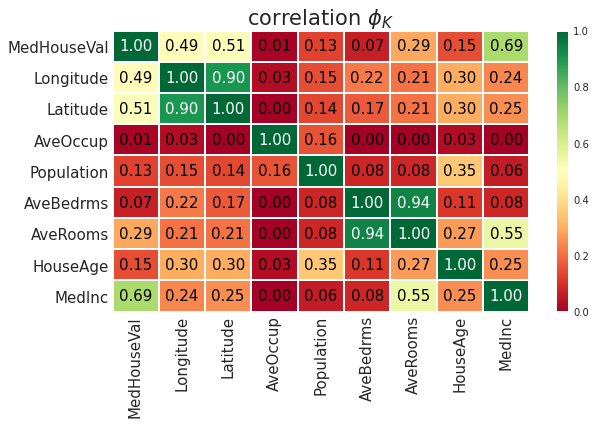

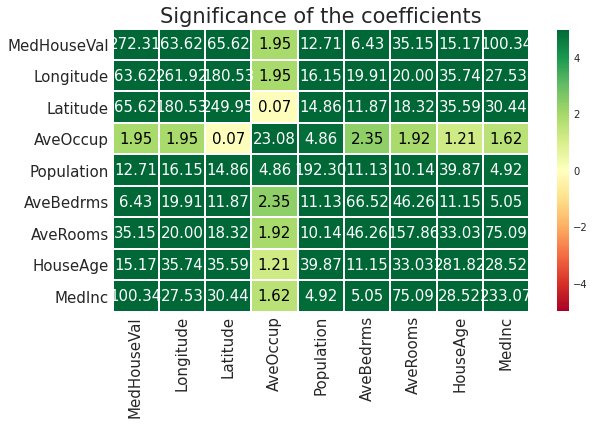

In [ ]:
df_Visual.phik_plotter(cols=df_clean.columns, size=(9, 6), fontSize=1.5)

With these nice violin plots, we can see some nice trends we discussed earlier, such as the house-building-hot-years in the unique amplitudes of house age column, the weird (heads-up – the collectors of this data did tell us, as I explained earlier) related features of avg. rooms and Occup, and population – and the similarity of MedInc and MedHouseVal.

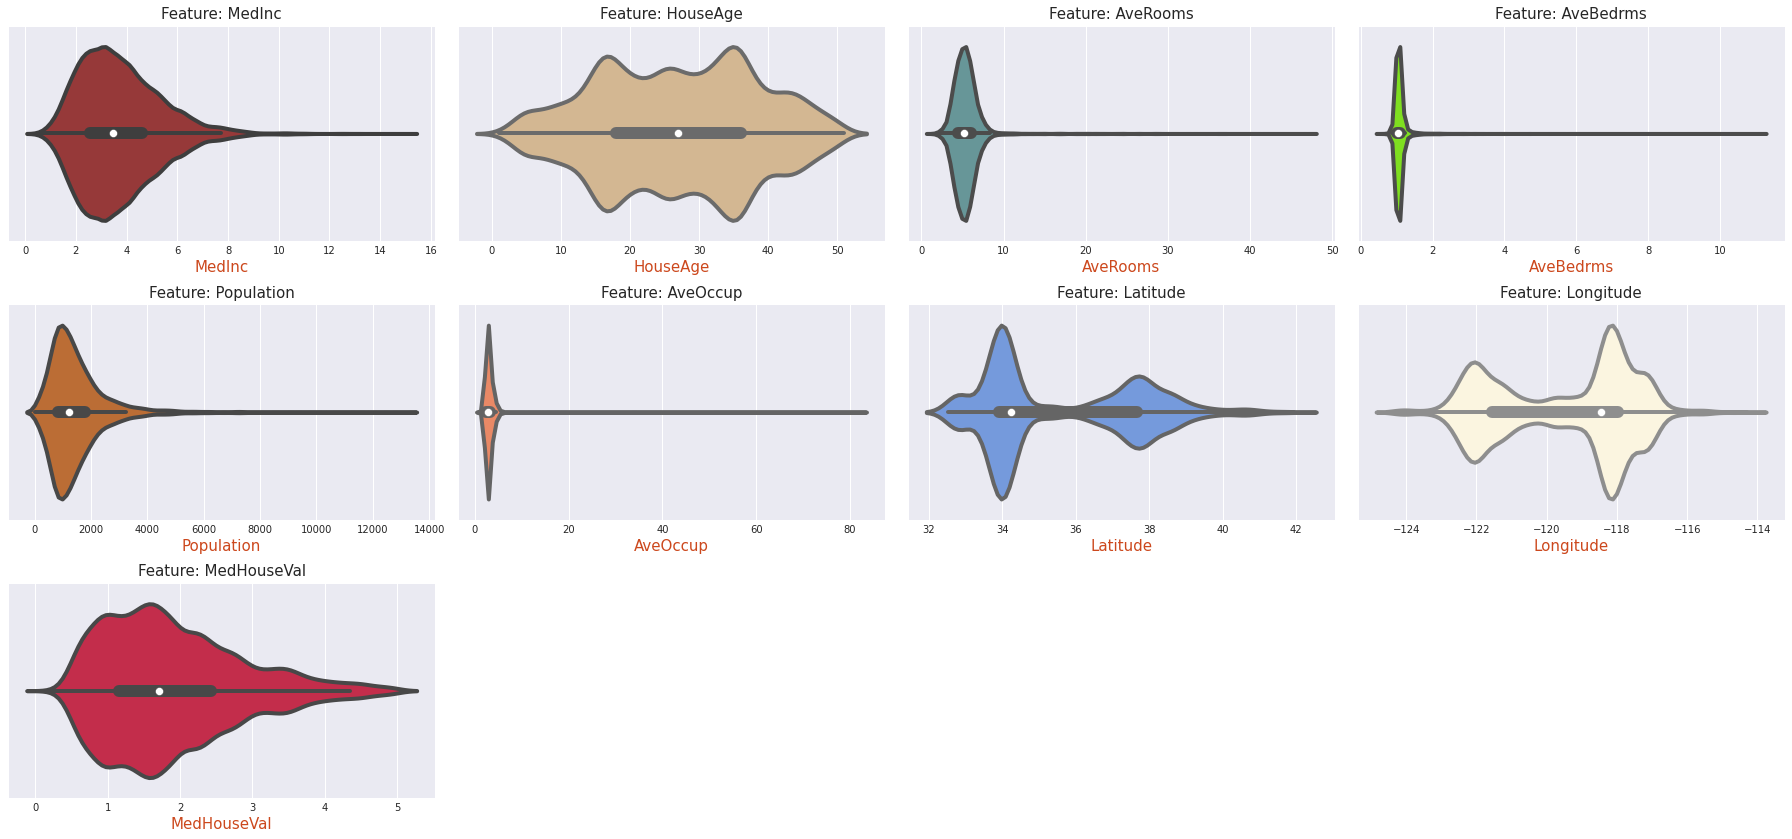

In [ ]:
df_Visual.violinploter_spars(df_clean.columns)

lastly for this part, after looking at this scattered map of houses to coordinate relation - and taking into account the formerly shown relation the avg. income, I found that the next two steps will be a great place to work on for the processing:
> (1)	**Finding the long ID of every group of houses and clustering them on the relatively informative scale in correlation to the house value by grouping them and target encoding them to a featuring location (county?)**

> (2)	**Since the distance to big cities and the coast seems to tell a big chunk of the house-value story, maybe I can add features of those distances. The only problem is that those are large distances we are looking at – and earth curviness needs to play part in the calculations.**


In [ ]:
df_Visual.val_house_on_map_ploter()

Run your preprocessing class in the next cell

In [ ]:
df_Preproced = Preprocessor(df.loc[:, df.columns != target_col], df.loc[:, target_col])
df_Visual = Visualization(df.loc[:, df.columns != target_col], df.loc[:, target_col])

df_clean = df_Preproced.remove_faulty_data(faulty_data=[{'label':'MedHouseVal', 'min': 0, 'max': 5},{'label': 'HouseAge', 'min': 0, 'max': 51}])
df_Visual.update_data(df_clean).describe_2()

For MedHouseVal: Removal of 965 (4.675% of the total data)
For HouseAge: Removal of 1103 (5.344% of the total data)


,count,mean,std,min,25%,50%,75%,max
MedInc,18572.000000,3.693262,1.570045,0.499900,2.537275,3.468350,4.616100,15.000100
HouseAge,18572.000000,26.983847,11.431815,1.000000,17.000000,27.000000,36.000000,51.000000
AveRooms,18572.000000,5.386957,2.337897,0.846154,4.430211,5.208816,5.989280,132.533333
AveBedrms,18572.000000,1.098443,0.463798,0.333333,1.005803,1.048309,1.099192,34.066667
Population,18572.000000,1470.392957,1162.944307,3.000000,811.000000,1203.000000,1781.000000,35682.000000
AveOccup,18572.000000,3.108596,10.811650,0.692308,2.469421,2.855824,3.320622,1243.333333
Latitude,18572.000000,35.593231,2.147712,32.540000,33.920000,34.240000,37.670000,41.950000
Longitude,18572.000000,-119.484929,1.980865,-124.300000,-121.550000,-118.450000,-117.970000,-114.310000
MedHouseVal,18572.000000,1.896076,0.957902,0.149990,1.154000,1.712000,2.432250,5.000000


In [ ]:
df_clean = df_Preproced.dist_cols_adder()
df_clean = df_Preproced.min_vel_rowise()
df_Visual.update_data(df_clean).describe_2()

,count,mean,std,min,25%,50%,75%,max
MedInc,18572.000000,3.693262,1.570045,0.499900,2.537275,3.468350,4.616100,15.000100
HouseAge,18572.000000,26.983847,11.431815,1.000000,17.000000,27.000000,36.000000,51.000000
AveRooms,18572.000000,5.386957,2.337897,0.846154,4.430211,5.208816,5.989280,132.533333
AveBedrms,18572.000000,1.098443,0.463798,0.333333,1.005803,1.048309,1.099192,34.066667
Population,18572.000000,1470.392957,1162.944307,3.000000,811.000000,1203.000000,1781.000000,35682.000000
AveOccup,18572.000000,3.108596,10.811650,0.692308,2.469421,2.855824,3.320622,1243.333333
Latitude,18572.000000,35.593231,2.147712,32.540000,33.920000,34.240000,37.670000,41.950000
Longitude,18572.000000,-119.484929,1.980865,-124.300000,-121.550000,-118.450000,-117.970000,-114.310000
MedHouseVal,18572.000000,1.896076,0.957902,0.149990,1.154000,1.712000,2.432250,5.000000
Distance_to_coast,18572.000000,43162.785827,50321.549286,120.676000,10707.714000,21864.862000,55537.777000,333804.686000


In [ ]:
df_clean = df_Preproced.county2houseValAdder_Xy_Split()

(18572, 16)
<<-----NA----->>
<<-----NA----->>
(18572, 16)


In [ ]:
df_Visual.update_data(df_clean).describe_2()

,count,mean,std,min,25%,50%,75%,max
MedInc,18572.000000,3.693262,1.570045,0.499900,2.537275,3.468350,4.616100,15.000100
HouseAge,18572.000000,26.983847,11.431815,1.000000,17.000000,27.000000,36.000000,51.000000
AveRooms,18572.000000,5.386957,2.337897,0.846154,4.430211,5.208816,5.989280,132.533333
AveBedrms,18572.000000,1.098443,0.463798,0.333333,1.005803,1.048309,1.099192,34.066667
Population,18572.000000,1470.392957,1162.944307,3.000000,811.000000,1203.000000,1781.000000,35682.000000
AveOccup,18572.000000,3.108596,10.811650,0.692308,2.469421,2.855824,3.320622,1243.333333
Latitude,18572.000000,35.593231,2.147712,32.540000,33.920000,34.240000,37.670000,41.950000
Longitude,18572.000000,-119.484929,1.980865,-124.300000,-121.550000,-118.450000,-117.970000,-114.310000
MedHouseVal,18572.000000,1.896076,0.957902,0.149990,1.154000,1.712000,2.432250,5.000000
Distance_to_coast,18572.000000,43162.785827,50321.549286,120.676000,10707.714000,21864.862000,55537.777000,333804.686000


In [ ]:
df_Visual.data_viewer_spars()

<<-----info----->>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18572 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MedInc                    18572 non-null  float64
 1   HouseAge                  18572 non-null  float64
 2   AveRooms                  18572 non-null  float64
 3   AveBedrms                 18572 non-null  float64
 4   Population                18572 non-null  float64
 5   AveOccup                  18572 non-null  float64
 6   Latitude                  18572 non-null  float64
 7   Longitude                 18572 non-null  float64
 8   MedHouseVal               18572 non-null  float64
 9   Distance_to_coast         18572 non-null  float64
 10  Distance_to_LA            18572 non-null  float64
 11  Distance_to_SanDiego      18572 non-null  float64
 12  Distance_to_SanJose       18572 non-null  float64
 13  Distance_to_SanFrancisco  18572 non-null  

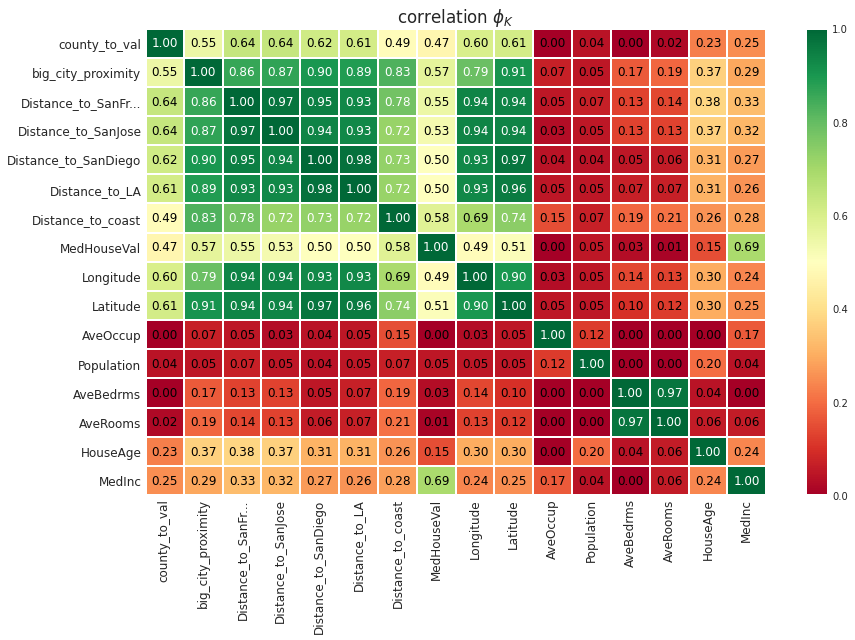

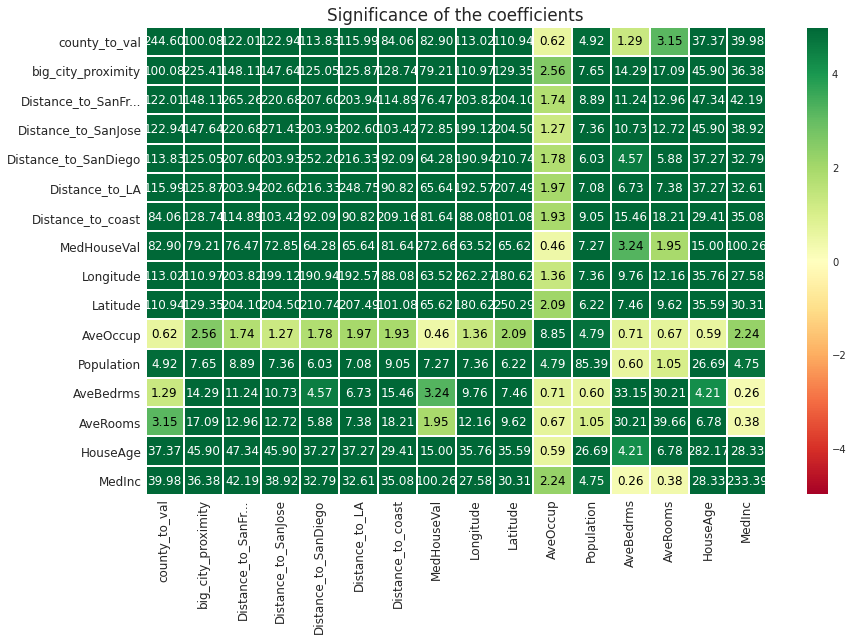

In [ ]:
df_Visual.phik_plotter(cols=df_clean.columns, size=(13, 9), fontSize=1.2)

# **<center>$4 - The Models$ 📈**

## Model Class

In [ ]:
class Model():
    
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def fit_params(self):
        self.X_train, self.X_test, self.y_train, self.y_test = split(self.X, self.y, test_size=.2, random_state=seedNum)
        self.model = xgb.XGBRegressor(objective='reg:squarederror', 
                                      eval_metric='rmse',
                                      use_label_encoder=False,
                                      random_state=seedNum)
        return self

    def global_shap_importance(self):
            # init shap_importance tool
            X = self.X_train
            model = self.early_model
            # reorder shap values to val's and feature names
            explainer = shap.Explainer(model)
            shap_values = explainer(X)
            cohorts = {"": shap_values}
            cohort_labels = list(cohorts.keys())
            cohort_exps = list(cohorts.values())
            for i in range(len(cohort_exps)):
                if len(cohort_exps[i].shape) == 2:
                    cohort_exps[i] = cohort_exps[i].abs.mean(0)
            features = cohort_exps[0].data
            feature_names = cohort_exps[0].feature_names
            values = np.array([cohort_exps[i].values for i in range(len(cohort_exps))])
            # wrap val's and feature names in DF
            shap_importance_df = pd.DataFrame(
                list(zip(feature_names, sum(values))), columns=['features', 'importance'])
            shap_importance_df.sort_values(
                by=['importance'], ascending=False, inplace=True)
            # display shap_importance data
            print(f'\ndata Shap_df with {shap_importance_df.shape[0]} rows and {shap_importance_df.shape[1]} columns')
            display(data_table.DataTable(shap_importance_df.head(20), include_index=True, num_rows_per_page=20, 
                                    max_rows=None, max_columns=df.shape[1], min_width=None))
            # plotting shap
            plt.figure()
            plt.subplot(311)
            shap.summary_plot(shap_values, X, plot_type="bar",plot_size=1.2)
            plt.tight_layout()
            plt.subplot(312)
            shap.summary_plot(shap_values, X ,plot_size=1.2)
            plt.tight_layout()
            plt.show();
            shap.plots.bar(shap_values, max_display=20)
            plt.tight_layout()
            plt.show();
    
    def my_model(self, score_mat='neg_mean_absolute_error', cv_k=5):
        # params init
        print('Model: XGBoost\n')
        my_cv = KFold(n_splits=cv_k, shuffle=True, random_state=seedNum)
        init_model = self.model
        self.early_model = init_model.fit(self.X_train, self.y_train)

        model_cv = -cross_val_score(self.early_model, self.X_train, self.y_train, cv=my_cv, scoring=score_mat)
        print(f'~~~~~Model~~~~~~\n')
        print(f'CV Score (k={cv_k})  Min: {model_cv.min():8.5f}, Mean: {model_cv.mean():8.5f}, Max: {model_cv.max():8.5f}')

        y_pred = self.early_model.predict(self.X_test)

        # score
        print(f'~~~~~~Score~~~~~\n')
        rmse_score = mse(self.y_test, y_pred)**0.5
        print(f"R^2: {r2_score(self.y_test, y_pred):.3f}")
        print(f'RMSE: {rmse_score:.3f}\n')

        # plot    
        print(f'~~~~~~Ploting~~~~~\n')
        plt.figure(figsize = (7,7), dpi=(100))
        sns.jointplot(x=self.y_test, y=y_pred, kind='reg', line_kws={"color": "red"})
        plt.ylabel('pred values')
        plt.xlabel('real values')
        plt.tight_layout()
        plt.show()

        print("@@@@@@@@@@@@@ < DONE > @@@@@@@@@@@@@@")

Model: XGBoost

~~~~~Model~~~~~~

CV Score (k=5)  Min:  0.31095, Mean:  0.31635, Max:  0.32289
~~~~~~Score~~~~~

R^2: 0.766
RMSE: 0.467

~~~~~~Ploting~~~~~



<Figure size 700x700 with 0 Axes>

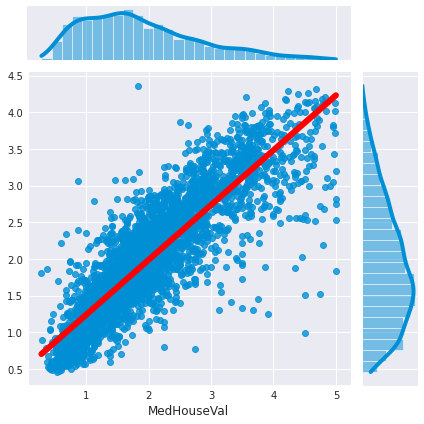

@@@@@@@@@@@@@ < DONE > @@@@@@@@@@@@@@

data Shap_df with 15 rows and 2 columns


,features,importance
0,MedInc,0.365541
5,AveOccup,0.165390
8,Distance_to_coast,0.164980
14,county_to_val,0.156033
13,big_city_proximity,0.098208
2,AveRooms,0.070009
6,Latitude,0.069501
7,Longitude,0.041929
9,Distance_to_LA,0.041194
11,Distance_to_SanJose,0.039269


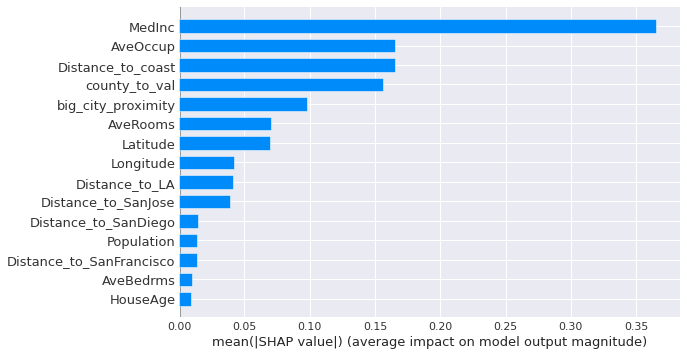

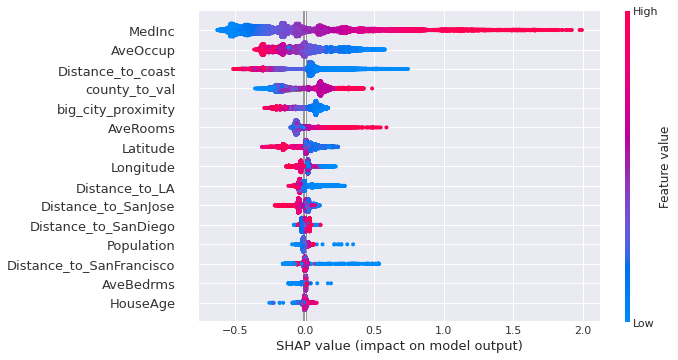

<Figure size 432x288 with 0 Axes>

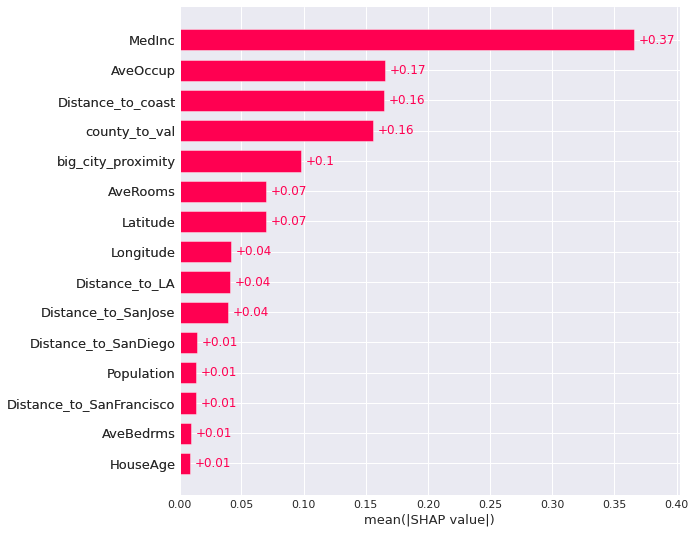

<Figure size 432x288 with 0 Axes>

In [ ]:
X_, y_ = df_clean.loc[:, df_clean.columns != target_col], df_clean.loc[:, target_col]
xgb_model = Model(X_, y_)
xgb_model.fit_params().my_model()
xgb_model.global_shap_importance()


# SCORE **G**

```
(Step G)

~~~~~~CV Score~~~~~
CV Score (k=5)  Min:  0.36193, Mean:  0.36907, Max:  0.37476
new:
CV Score (k=5)  Min:  0.34660, Mean:  0.35718, Max:  0.36429
new:
CV Score (k=5)  Min:  0.32854, Mean:  0.33403, Max:  0.33646
new:
CV Score (k=5)  Min:  0.32942, Mean:  0.33301, Max:  0.33727
new:
CV Score (k=5)  Min:  0.32453, Mean:  0.32826, Max:  0.33223
new:
CV Score (k=5)  Min:  0.31307, Mean:  0.31885, Max:  0.32433

First mosel after Preprocessor:
CV Score (k=5)  Min:  0.31095, Mean:  0.31635, Max:  0.32289

~~~~~~Model Score~~~~~
R^2: 0.778
RMSE: 0.536
new:
R^2: 0.791
RMSE: 0.522
new:
R^2: 0.748
RMSE: 0.482
new:
R^2: 0.747
RMSE: 0.483
new:
R^2: 0.756
RMSE: 0.474
new:
R^2: 0.767
RMSE: 0.463

First mosel after Preprocessor:
R^2: 0.767
RMSE: 0.467

```

## Hyperparameter tuning ( HyperparameterTuner Class)

In [ ]:
class HyperparameterTuner():
    
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def fit_params(self, colsampleMax=0.5, n_estim=[1500], lrMin=0.05, maxDepth=[3,4,5]):
        self.X_train, self.X_test, self.y_train, self.y_test = split(self.X, self.y, test_size=.2, random_state=seedNum)

        self.param_grid_xgb = {'colsample_bytree': loguniform(0.35, colsampleMax),
                                'n_estimators': n_estim,
                                'learning_rate': loguniform(lrMin,0.4),
                                'max_depth': maxDepth,
                                'alpha': loguniform(10,11), 
                                'scale_pos_weight': [1,3], 
                                'min_child_weight': [5,6,7]}
        self.model = xgb.XGBRegressor(objective='reg:squarederror', 
                                      eval_metric='rmse',
                                      use_label_encoder=False,
                                      random_state=seedNum)
        return self

    def global_shap_importance(self):
            # init shap_importance tool
            X = self.X_train
            model = self.early_model
            # reorder shap values to val's and feature names
            explainer = shap.Explainer(model)
            shap_values = explainer(X)
            cohorts = {"": shap_values}
            cohort_labels = list(cohorts.keys())
            cohort_exps = list(cohorts.values())
            for i in range(len(cohort_exps)):
                if len(cohort_exps[i].shape) == 2:
                    cohort_exps[i] = cohort_exps[i].abs.mean(0)
            features = cohort_exps[0].data
            feature_names = cohort_exps[0].feature_names
            values = np.array([cohort_exps[i].values for i in range(len(cohort_exps))])
            # wrap val's and feature names in DF
            shap_importance_df = pd.DataFrame(
                list(zip(feature_names, sum(values))), columns=['features', 'importance'])
            shap_importance_df.sort_values(
                by=['importance'], ascending=False, inplace=True)
            # display shap_importance data
            print(f'\ndata Shap_df with {shap_importance_df.shape[0]} rows and {shap_importance_df.shape[1]} columns')
            display(data_table.DataTable(shap_importance_df.head(20), include_index=True, num_rows_per_page=20, 
                                    max_rows=None, max_columns=df.shape[1], min_width=None))
            # plotting shap
            plt.figure()
            plt.subplot(311)
            shap.summary_plot(shap_values, X, plot_type="bar", plot_size=1.2)
            plt.tight_layout()
            plt.subplot(312)
            shap.summary_plot(shap_values, X, plot_size=1.2)
            plt.tight_layout()
            plt.show();
            shap.plots.bar(shap_values, max_display=20)
            plt.tight_layout()
            plt.show();
    
    def my_tuning_model(self, score_mat='neg_mean_absolute_error', cv_k=5, epochs=10):
        print('Model: XGBoost\n')
        my_cv = KFold(n_splits=cv_k, shuffle=True, random_state=seedNum)
        init_model = self.model
        self.early_model = init_model.fit(self.X_train, self.y_train)

        the_model = self.model
        param_grid = self.param_grid_xgb
        model_rs = RandomizedSearchCV(the_model, param_grid, scoring=score_mat, 
                                    n_iter=epochs, random_state=seedNum, 
                                    n_jobs=-1, cv=my_cv)
        self.xgb_model = model_rs.fit(self.X_train, self.y_train)
        try:
            best_rs_param = self.xgb_model.best_params_
            best_rs_predictor = self.xgb_model.best_estimator_
            model_cv = -cross_val_score(best_rs_predictor, X_train, y_train, cv=my_cv, scoring=score_mat)
            print(f'~~~~~Model~~~~~~\n')
            print(f'Clf Best Params:  {best_rs_param}')
            print(f'Clf Best predictor:  {best_rs_predictor}')
            print(f'CV Score (k={cv_k})  Min: {model_cv.min():8.5f}, Mean: {model_cv.mean():8.5f}, Max: {model_cv.max():8.5f}')
        except:
            model_cv = -cross_val_score(self.xgb_model, self.X_train, self.y_train, cv=my_cv, scoring=score_mat)
            print(f'~~~~~Model~~~~~~\n')
            print(f'CV Score (k={cv_k})  Min: {model_cv.min():8.5f}, Mean: {model_cv.mean():8.5f}, Max: {model_cv.max():8.5f}')

        y_pred = self.xgb_model.predict(self.X_test)

        # score
        print(f'~~~~~~Score~~~~~\n')
        rmse_score = mse(self.y_test, y_pred)**0.5
        print(f"R^2: {r2_score(self.y_test, y_pred):.3f}")
        print(f'RMSE: {rmse_score:.3f}\n')

        # plot    
        print(f'~~~~~~Ploting~~~~~\n')
        plt.figure(figsize = (7,7), dpi=(100))
        sns.jointplot(x=self.y_test, y=y_pred, kind='reg', line_kws={"color": "red"})
        plt.ylabel('pred values')
        plt.xlabel('real values')
        plt.tight_layout()
        plt.show()

        print("@@@@@@@@@@@@@ < DONE > @@@@@@@@@@@@@@")

Model: XGBoost

~~~~~Model~~~~~~

CV Score (k=5)  Min:  0.25287, Mean:  0.25736, Max:  0.26019
~~~~~~Score~~~~~

R^2: 0.833
RMSE: 0.395

~~~~~~Ploting~~~~~



<Figure size 700x700 with 0 Axes>

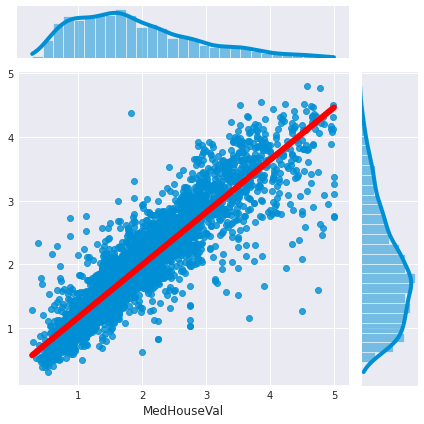

@@@@@@@@@@@@@ < DONE > @@@@@@@@@@@@@@

data Shap_df with 15 rows and 2 columns


,features,importance
0,MedInc,0.365541
5,AveOccup,0.165390
8,Distance_to_coast,0.164980
14,county_to_val,0.156033
13,big_city_proximity,0.098208
2,AveRooms,0.070009
6,Latitude,0.069501
7,Longitude,0.041929
9,Distance_to_LA,0.041194
11,Distance_to_SanJose,0.039269


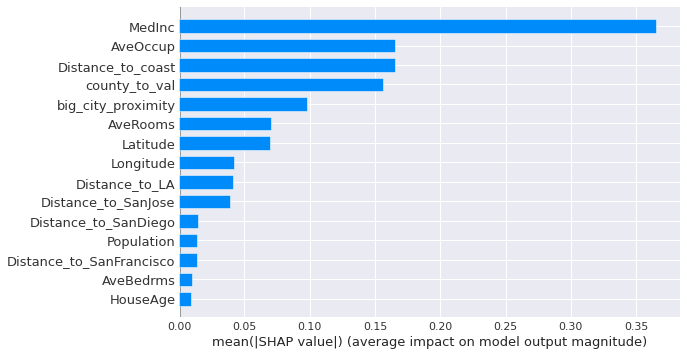

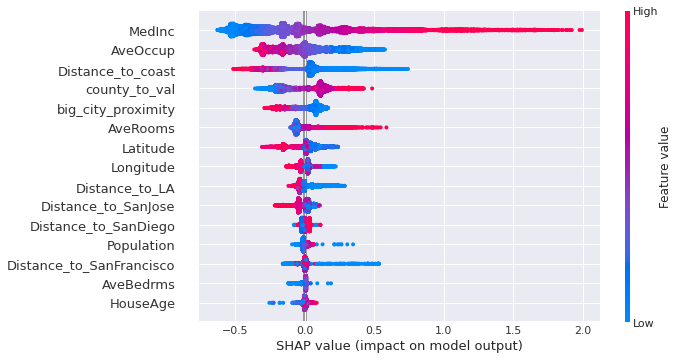

<Figure size 432x288 with 0 Axes>

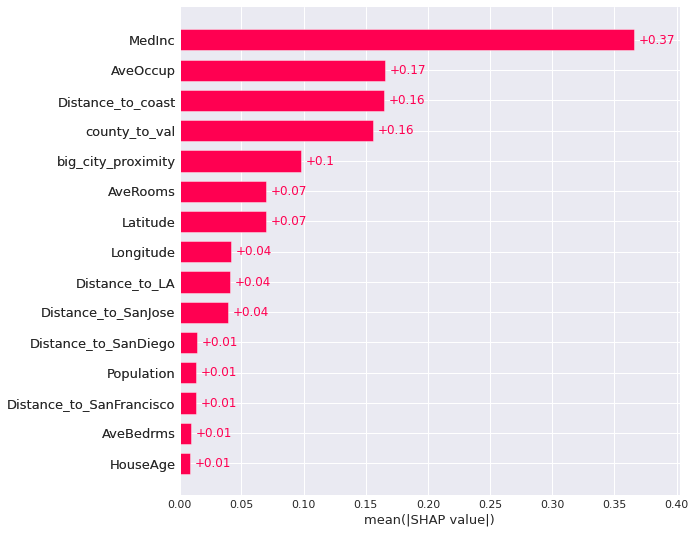

<Figure size 432x288 with 0 Axes>

In [ ]:
X_2, y_2 = df_clean.loc[:, df_clean.columns != target_col], df_clean.loc[:, target_col]
xgb_tuning_model = HyperparameterTuner(X_2, y_2)
xgb_tuning_model.fit_params().my_tuning_model()
xgb_tuning_model.global_shap_importance()


## Results

# SCORE **H**

```
(Step H)

~~~~~~CV Score~~~~~
CV Score (k=5)  Min:  0.36193, Mean:  0.36907, Max:  0.37476
new:
CV Score (k=5)  Min:  0.34660, Mean:  0.35718, Max:  0.36429
new:
CV Score (k=5)  Min:  0.32854, Mean:  0.33403, Max:  0.33646
new:
CV Score (k=5)  Min:  0.32942, Mean:  0.33301, Max:  0.33727
new:
CV Score (k=5)  Min:  0.32453, Mean:  0.32826, Max:  0.33223
new:
CV Score (k=5)  Min:  0.31307, Mean:  0.31885, Max:  0.32433

First mosel after Preprocessor:
CV Score (k=5)  Min:  0.31095, Mean:  0.31635, Max:  0.32289

Tuning mosel after Preprocessor:
CV Score (k=5)  Min:  0.29982, Mean:  0.30761, Max:  0.31158

~~~~~~Model Score~~~~~
R^2: 0.778
RMSE: 0.536
new:
R^2: 0.791
RMSE: 0.522
new:
R^2: 0.748
RMSE: 0.482
new:
R^2: 0.747
RMSE: 0.483
new:
R^2: 0.756
RMSE: 0.474
new:
R^2: 0.767
RMSE: 0.463

First mosel after Preprocessor:
R^2: 0.767
RMSE: 0.467

Tuning mosel after Preprocessor:
R^2: 0.833
RMSE: 0.395

```

# **The conclusion is as follows:**

I won’t be repeating all of what I discovered and demonstrated, as I’m sure it took as long to read and go over – almost as it was to make.
I will add that following the bench-mark models that I followed along with my work (A-H), and together with the PhiK and Shap, a picture can drown to accommodate for what I showed – 

1.	The features I created and added, that was a result of statistical deduction and inspection of the relationships within the features, proved to have improved the model, almost 2 times over.

2.	The reasoning I have given to my actions, I hope, agreed with you.

3.	I tried to keep it clean, coherent, and flowing – I hope you felt it.

4.	 Of course, there is plenty more stuff, and direction, that I could have explored – but again – time is a factor.

5.	I hope you enjoyed the playground featured I looked on and didn’t make it to the final processing stage. I believe some of them are not too far from having a true impact (that silhouette score of the distances from the big cities was getting there). 

* I also think some feature selection will be a good idea haven’t had the time to investigate it in the scope of this short project 😊

**I hope you found my work pleasing, and that you enjoyed the extra twists ^^**
